# Obtenção dos Dados

In [105]:
!pip install ipeadatapy

In [106]:
import ipeadatapy as ip

In [107]:
series = ip.list_series()
print(series)

                     CODE                                               NAME
0            ABATE_ABPEAV                   Abate - aves - peso das carcaças
1            ABATE_ABPEBV                Abate - bovinos - peso das carcaças
2            ABATE_ABPESU                 Abate - suínos - peso das carcaças
3            ABATE_ABQUAV                          Abate - aves - quantidade
4            ABATE_ABQUBV                       Abate - bovinos - quantidade
...                   ...                                                ...
8974  PNADCT_TXPARTCUF_SI  Taxa de participação - sem instrução ou equiva...
8975           PNAD_IAGRV         Domicílios com insegurança alimentar grave
8976           PNAD_IALEV          Domicílios com insegurança alimentar leve
8977           PNAD_IAMOD      Domicílios com insegurança alimentar moderada
8978           PNAD_SATOT                 Domicílios com segurança alimentar

[8979 rows x 2 columns]


In [108]:
cod = "EIA366_PBRENT366"
eia366 = ip.timeseries(cod)
print(eia366.head(5))

                        CODE                   RAW DATE  DAY  MONTH  YEAR  \
DATE                                                                        
1986-01-04  EIA366_PBRENT366  1986-01-04T00:00:00-02:00    4      1  1986   
1986-01-05  EIA366_PBRENT366  1986-01-05T00:00:00-02:00    5      1  1986   
1986-01-06  EIA366_PBRENT366  1986-01-06T00:00:00-02:00    6      1  1986   
1986-01-07  EIA366_PBRENT366  1986-01-07T00:00:00-02:00    7      1  1986   
1986-01-08  EIA366_PBRENT366  1986-01-08T00:00:00-02:00    8      1  1986   

            VALUE (US$)  
DATE                     
1986-01-04          NaN  
1986-01-05          NaN  
1986-01-06          NaN  
1986-01-07          NaN  
1986-01-08          NaN  


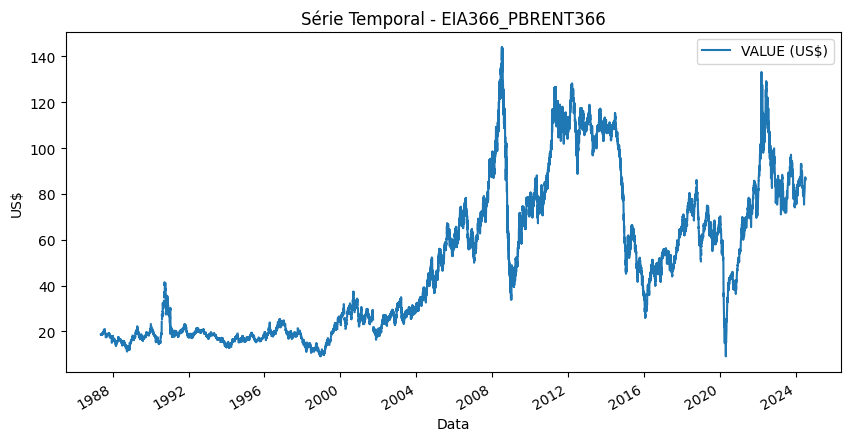

In [109]:
import matplotlib.pyplot as plt

# plota os dados
eia366[["VALUE (US$)"]].plot(figsize=(10, 5))
plt.title("Série Temporal - EIA366_PBRENT366")
plt.xlabel("Data")
plt.ylabel("US$")
plt.show()

In [110]:
eia366[["VALUE (US$)"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13473 entries, 1986-01-04 to 2024-07-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   VALUE (US$)  11203 non-null  float64
dtypes: float64(1)
memory usage: 210.5 KB


# Engenharia de Features

In [111]:
eia366 = eia366[["VALUE (US$)"]]
eia366.rename(columns={"VALUE (US$)": "value_usd"}, inplace=True)
eia366.index.name = "date"
eia366 = eia366.dropna()
print(eia366)

            value_usd
date                 
1987-05-20      18.63
1987-05-21      18.45
1987-05-22      18.55
1987-05-25      18.60
1987-05-26      18.63
...               ...
2024-06-25      86.81
2024-06-26      85.76
2024-06-27      87.00
2024-06-28      87.26
2024-07-01      86.57

[11203 rows x 1 columns]


In [112]:
df = eia366.copy()

In [113]:
df

,value_usd
date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2024-06-25,86.81
2024-06-26,85.76
2024-06-27,87.00


In [114]:
# lags de 1 a 7 dias do preço
for lag in range(1, 8):
    df[f"lag_{lag}"] = df["value_usd"].shift(lag)

In [115]:
df

,value_usd,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
1987-05-20,18.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-21,18.45,18.63,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-22,18.55,18.45,18.63,NaN,NaN,NaN,NaN,NaN
1987-05-25,18.60,18.55,18.45,18.63,NaN,NaN,NaN,NaN
1987-05-26,18.63,18.60,18.55,18.45,18.63,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-06-25,86.81,86.75,86.42,85.92,85.64,84.79,82.45,81.49
2024-06-26,85.76,86.81,86.75,86.42,85.92,85.64,84.79,82.45
2024-06-27,87.00,85.76,86.81,86.75,86.42,85.92,85.64,84.79


In [116]:
# média móvel de 7 dias do preço
df["rolling_mean_7"] = df["value_usd"].shift(1).rolling(window=7).mean()

In [117]:
df

,value_usd,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7
date,,,,,,,,,
1987-05-20,18.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-21,18.45,18.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-22,18.55,18.45,18.63,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-25,18.60,18.55,18.45,18.63,NaN,NaN,NaN,NaN,NaN
1987-05-26,18.63,18.60,18.55,18.45,18.63,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-06-25,86.81,86.75,86.42,85.92,85.64,84.79,82.45,81.49,84.780000
2024-06-26,85.76,86.81,86.75,86.42,85.92,85.64,84.79,82.45,85.540000
2024-06-27,87.00,85.76,86.81,86.75,86.42,85.92,85.64,84.79,86.012857


In [118]:
# diferenças de preço entre os dias
df["diff"] = df["value_usd"].shift(1).diff()

In [119]:
df[["diff"]]

,diff
date,
1987-05-20,NaN
1987-05-21,NaN
1987-05-22,-0.18
1987-05-25,0.10
1987-05-26,0.05
...,...
2024-06-25,0.33
2024-06-26,0.06
2024-06-27,-1.05


In [120]:
# componentes sazonais
df["month"] = df.index.month
df["day_of_week"] = df.index.dayofweek

In [121]:
df[["month", "day_of_week"]]

,month,day_of_week
date,,
1987-05-20,5,2
1987-05-21,5,3
1987-05-22,5,4
1987-05-25,5,0
1987-05-26,5,1
...,...,...
2024-06-25,6,1
2024-06-26,6,2
2024-06-27,6,3


In [122]:
# desvio padrão móvel do preço na janela de 7 dias
df["rolling_std_7"] = df["value_usd"].shift(1).rolling(window=7).std()

In [123]:
df[["rolling_std_7"]]

,rolling_std_7
date,
1987-05-20,NaN
1987-05-21,NaN
1987-05-22,NaN
1987-05-25,NaN
1987-05-26,NaN
...,...
2024-06-25,2.035633
2024-06-26,1.533862
2024-06-27,0.713155


In [124]:
# variáveis de calendário
df["day"] = df.index.day
df["quarter"] = df.index.quarter
df["year"] = df.index.year

In [125]:
df[["day", "quarter", "year"]]

,day,quarter,year
date,,,
1987-05-20,20,2,1987
1987-05-21,21,2,1987
1987-05-22,22,2,1987
1987-05-25,25,2,1987
1987-05-26,26,2,1987
...,...,...,...
2024-06-25,25,2,2024
2024-06-26,26,2,2024
2024-06-27,27,2,2024


In [126]:
df = df.dropna()

In [127]:
print(df.head())

            value_usd  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  \
date                                                                     
1987-05-29      18.58  18.60  18.60  18.63  18.60  18.55  18.45  18.63   
1987-06-01      18.65  18.58  18.60  18.60  18.63  18.60  18.55  18.45   
1987-06-02      18.68  18.65  18.58  18.60  18.60  18.63  18.60  18.55   
1987-06-03      18.75  18.68  18.65  18.58  18.60  18.60  18.63  18.60   
1987-06-04      18.78  18.75  18.68  18.65  18.58  18.60  18.60  18.63   

            rolling_mean_7  diff  month  day_of_week  rolling_std_7  day  \
date                                                                       
1987-05-29       18.580000  0.00      5            4       0.063246   29   
1987-06-01       18.572857 -0.02      6            0       0.059362    1   
1987-06-02       18.601429  0.07      6            1       0.032367    2   
1987-06-03       18.620000  0.03      6            2       0.035119    3   
1987-06-04       18.64142

In [128]:
df

,value_usd,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,diff,month,day_of_week,rolling_std_7,day,quarter,year
date,,,,,,,,,,,,,,,,
1987-05-29,18.58,18.60,18.60,18.63,18.60,18.55,18.45,18.63,18.580000,0.00,5,4,0.063246,29,2,1987
1987-06-01,18.65,18.58,18.60,18.60,18.63,18.60,18.55,18.45,18.572857,-0.02,6,0,0.059362,1,2,1987
1987-06-02,18.68,18.65,18.58,18.60,18.60,18.63,18.60,18.55,18.601429,0.07,6,1,0.032367,2,2,1987
1987-06-03,18.75,18.68,18.65,18.58,18.60,18.60,18.63,18.60,18.620000,0.03,6,2,0.035119,3,2,1987
1987-06-04,18.78,18.75,18.68,18.65,18.58,18.60,18.60,18.63,18.641429,0.07,6,3,0.058716,4,2,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,86.81,86.75,86.42,85.92,85.64,84.79,82.45,81.49,84.780000,0.33,6,1,2.035633,25,2,2024
2024-06-26,85.76,86.81,86.75,86.42,85.92,85.64,84.79,82.45,85.540000,0.06,6,2,1.533862,26,2,2024
2024-06-27,87.00,85.76,86.81,86.75,86.42,85.92,85.64,84.79,86.012857,-1.05,6,3,0.713155,27,2,2024


# Treino do modelo de ML D+1

In [129]:
# divisão manual dos dados de treino e teste
train_size = int(len(eia366) * 0.9)
train, test = eia366.iloc[:train_size], eia366.iloc[train_size:]

In [130]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# classe customizada para engenharia de features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, target, lags, window_size):
        self.target = target
        self.lags = lags
        self.window_size = window_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for lag in range(1, self.lags + 1):
            X[f"lag_{lag}"] = X[self.target].shift(lag)
        X[f"rolling_mean_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).mean()
        X["diff"] = X[self.target].shift(1).diff()
        X["month"] = X.index.month
        X["day_of_week"] = X.index.dayofweek
        X[f"rolling_std_{self.window_size}"] = X[self.target].shift(1).rolling(window=self.window_size).std()
        X["day"] = X.index.day
        X["quarter"] = X.index.quarter
        X["year"] = X.index.year
        X = X.drop(columns=self.target)
        X.fillna(0, inplace=True)
        return X

# pipeline de steps
pipeline = Pipeline([
    ("feature_engineering", FeatureEngineer(target="value_usd", lags=7, window_size=7)),
    ("scaler", StandardScaler()),
    ("model", GradientBoostingRegressor())
])

# espaço amostral de hiperparâmetros
param_grid = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1]
}

# TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=3)

# HalvingGridSearchCV para busca de melhor combinação de hiperparâmetros
search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    factor=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

X_train = train.copy()  # inclui a coluna 'value_usd' no X para uso no pipeline de feature engineering
y_train = train["value_usd"]

# fit do modelo
search.fit(X_train, y_train)

# melhores hiperparâmetros e score
print("Best parameters found: ", search.best_params_)
print("Best score: ", search.best_score_)


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 3360
max_resources_: 10082
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 3360
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 10080
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'model__learning_rate': 0.1, 'model__n_estimators': 100}
Best score:  -1204.7345184111775


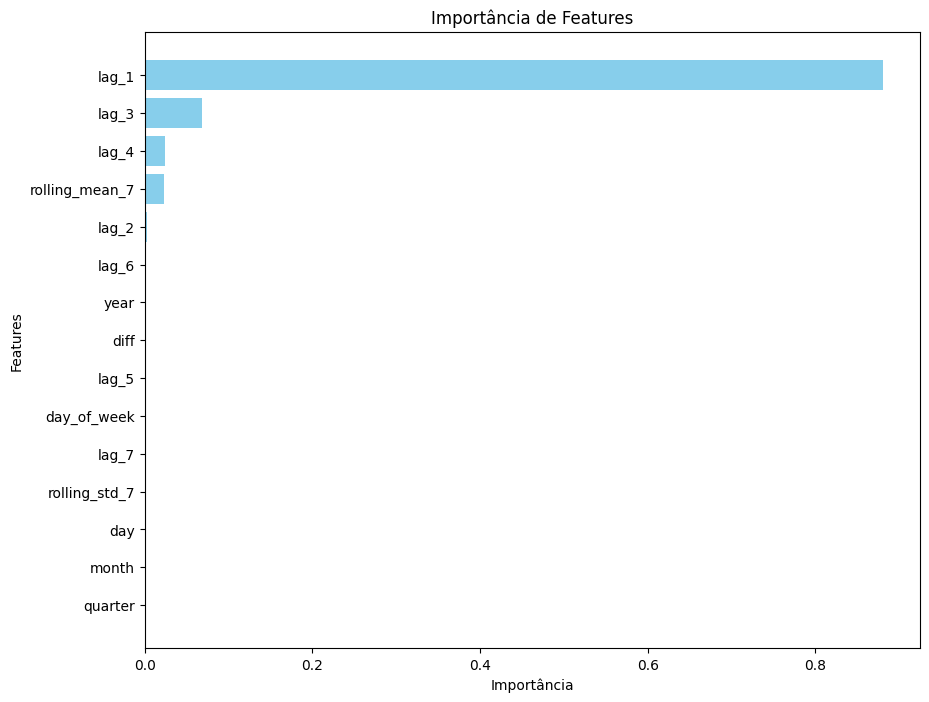

In [131]:
import pandas as pd

# acessando o melhor modelo encontrado
best_model = search.best_estimator_

# extraindo o transformador de engenharia de features
feature_engineering = best_model.named_steps["feature_engineering"]

# transformando X para obter o nome das features geradas
X_transformed = feature_engineering.transform(X_train)
feature_names = X_transformed.columns

# acessando as importâncias das features
importances = best_model.named_steps["model"].feature_importances_

# DataFrame para as importâncias das features
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# plotando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância de Features")
plt.gca().invert_yaxis()  # Inverte o eixo y para a feature mais importante aparecer no topo
plt.show()

# Avaliação de Performance D+1


In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error, 
    r2_score
)

# extraindo as features e o target
X_test = test.copy()
y_test = test["value_usd"]

# previsões no conjunto de teste
y_pred = search.predict(X_test)

# avaliação da performance
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R² Score:", r2)

Mean Absolute Error: 1.9039274298022462
Mean Absolute Percentage Error: 0.030019812259654912
R² Score: 0.9861882037686739


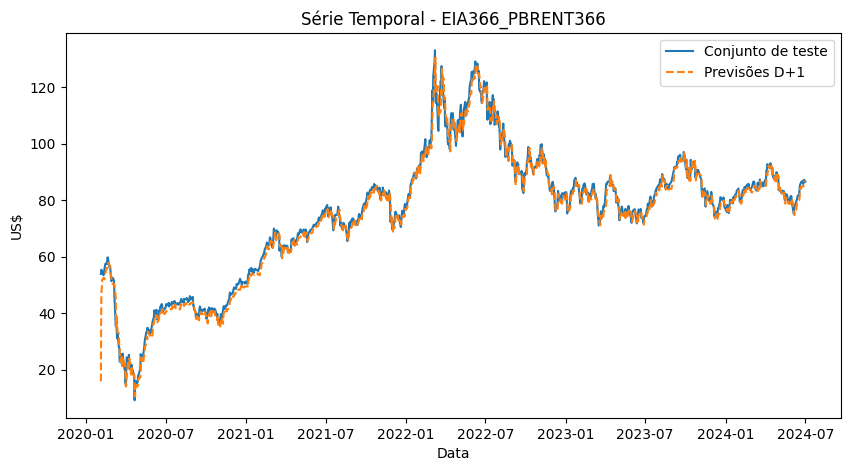

In [133]:
# plot das previsões vs valores reais
plt.figure(figsize=(10, 5))
plt.title("Série Temporal - EIA366_PBRENT366")
plt.plot(y_test.index, y_test, label="Conjunto de teste")
plt.plot(y_test.index, y_pred, label="Previsões D+1", linestyle='--')
plt.xlabel("Data")
plt.ylabel("US$")
plt.legend()
plt.show()

# Treino do modelo de ML D+15

In [134]:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# classe customizada para engenharia de features
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, target, lags, window_size):
        self.target = target
        self.lags = lags
        self.window_size = window_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for lag in range(0, self.lags):
            X[f"lag_{lag+1}"] = X[self.target].shift(lag)
        X[f"rolling_mean_{self.window_size}"] = X[self.target].rolling(window=self.window_size).mean()
        X["diff"] = X[self.target].diff()
        X["month"] = X.index.month
        X["day_of_week"] = X.index.dayofweek
        X[f"rolling_std_{self.window_size}"] = X[self.target].rolling(window=self.window_size).std()
        X["day"] = X.index.day
        X["quarter"] = X.index.quarter
        X["year"] = X.index.year
        X = X.drop(columns=[self.target])
        X.fillna(0, inplace=True)
        return X

# pipeline de steps
pipeline = Pipeline([
    ("feature_engineering", FeatureEngineer(target="value_usd", lags=15, window_size=15)),
    ("scaler", StandardScaler()),
    ("model", RegressorChain(base_estimator=GradientBoostingRegressor()))
])

# espaço amostral de hiperparâmetros
param_grid = {
    "model__base_estimator__n_estimators": [100, 200],
    "model__base_estimator__learning_rate": [0.05, 0.1],
}

# TimeSeriesSplit para validação cruzada
tscv = TimeSeriesSplit(n_splits=3)

# HalvingGridSearchCV para busca de melhor combinação de hiperparâmetros
search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=tscv,
    factor=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=123
)

X_train = train.copy()  # inclui a coluna 'value_usd' no X para uso no pipeline de feature engineering
y_train = pd.concat([train["value_usd"].shift(-i) for i in range(0, 15)], axis=1).dropna()  # criando as colunas para previsão de D+15
y_train.columns = [f"value_usd_t{i+1}" for i in range(0, 15)]
X_train = X_train.iloc[:len(y_train)]  # alinhando X e y

# fit do modelo
search.fit(X_train, y_train)

# melhores hiperparâmetros e score
print("Best parameters found: ", search.best_params_)
print("Best score: ", search.best_score_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 3356
max_resources_: 10068
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 3356
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 10068
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'model__base_estimator__learning_rate': 0.1, 'model__base_estimator__n_estimators': 100}
Best score:  -346.5332569523525


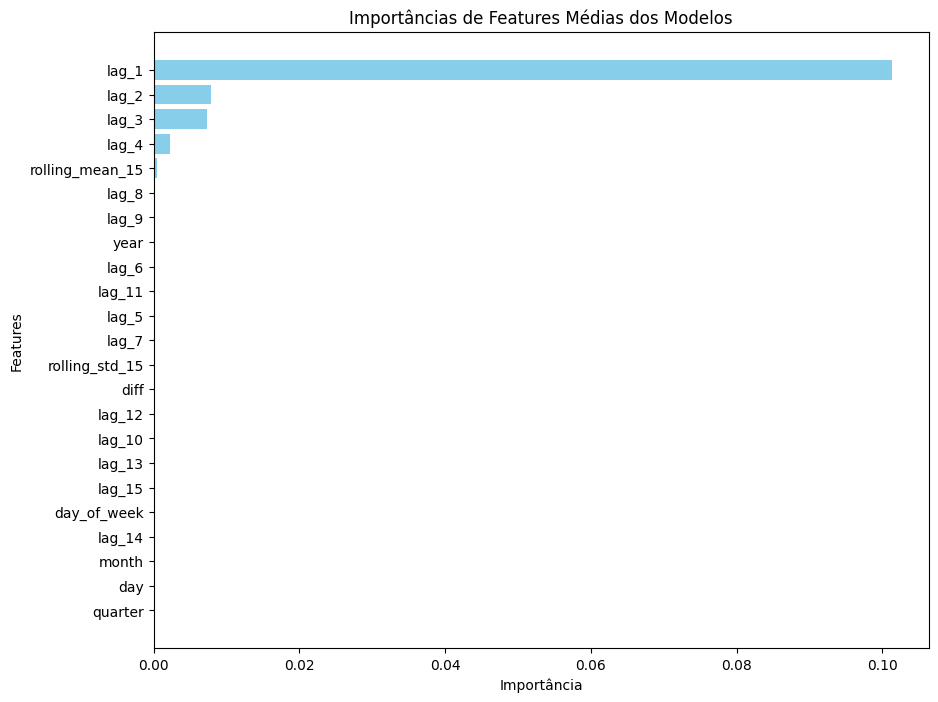

In [135]:
import numpy as np

# melhor modelo
best_pipeline = search.best_estimator_
best_regressor_chain = best_pipeline.named_steps["model"]

# extraindo o transformador de engenharia de features
feature_engineering = best_pipeline.named_steps["feature_engineering"]

# transformando X para obter as features geradas
X_transformed = feature_engineering.transform(X_train)
feature_names = X_transformed.columns

# inicializando a matriz para armazenar as importâncias das features
num_original_features = X_transformed.shape[1]
feature_importances = np.zeros(num_original_features)

# extraindo a importância de features de cada regressor na cadeia
for estimator in best_regressor_chain.estimators_:
    importances = estimator.feature_importances_[:num_original_features]
    feature_importances[:len(importances)] += importances

# normalizando as importâncias das features
feature_importances /= len(best_regressor_chain.estimators_)

# DataFrame para as importâncias das features
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# plotando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importâncias de Features Médias dos Modelos")
plt.gca().invert_yaxis()  # Inverte o eixo y para a feature mais importante aparecer no topo
plt.show()

# Avaliação de Performance D+15

In [136]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error, 
    r2_score
)

# extraindo as features e o target
X_test = test.copy()
y_test = pd.concat([test["value_usd"].shift(-i) for i in range(1, 16)], axis=1).dropna()
y_test.columns = [f"value_usd_t{i}" for i in range(1, 16)]
X_test = X_test.iloc[:len(y_test)]  # alinhando X_test e y_test

# previsões no conjunto de teste
y_pred = search.predict(X_test)

# avaliação da performance
mae = mean_absolute_error(y_test, y_pred, multioutput="raw_values")
mape = mean_absolute_percentage_error(y_test, y_pred, multioutput="raw_values")
r2 = r2_score(y_test, y_pred, multioutput="raw_values")

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R² Score:", r2)

Mean Absolute Error: [1.45615929 2.18334899 2.70513169 3.03750024 3.35721329 3.67009378
 3.89519579 4.17270206 4.38281029 4.58468091 4.80932988 5.05690268
 5.27796157 5.50935366 5.88346308]
Mean Absolute Percentage Error: [0.02233522 0.03338917 0.04118053 0.04764357 0.05279204 0.05770599
 0.0615573  0.06686003 0.07101933 0.07487927 0.07891545 0.08308195
 0.08653205 0.09070271 0.09561438]
R² Score: [0.99170197 0.98150309 0.97252782 0.9655709  0.95741624 0.94995717
 0.94457996 0.93759917 0.93095289 0.92494676 0.91901276 0.91032345
 0.90427099 0.8968363  0.88720643]


In [137]:
pd.DataFrame({
    "Previsão": [f"D+{i}" for i in range(1, 16)],
    "Mean Absolute Error": mae,
    "Mean Absolute Percentage Error": mape,
    "R² Score": r2
})

,Previsão,Mean Absolute Error,Mean Absolute Percentage Error,R² Score
0,D+1,1.456159,0.022335,0.991702
1,D+2,2.183349,0.033389,0.981503
2,D+3,2.705132,0.041181,0.972528
3,D+4,3.037500,0.047644,0.965571
4,D+5,3.357213,0.052792,0.957416
5,D+6,3.670094,0.057706,0.949957
6,D+7,3.895196,0.061557,0.944580
7,D+8,4.172702,0.066860,0.937599
8,D+9,4.382810,0.071019,0.930953
9,D+10,4.584681,0.074879,0.924947


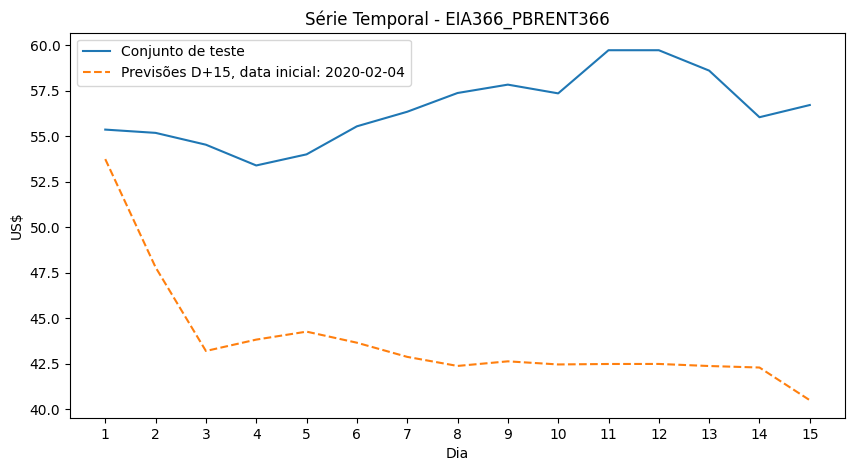

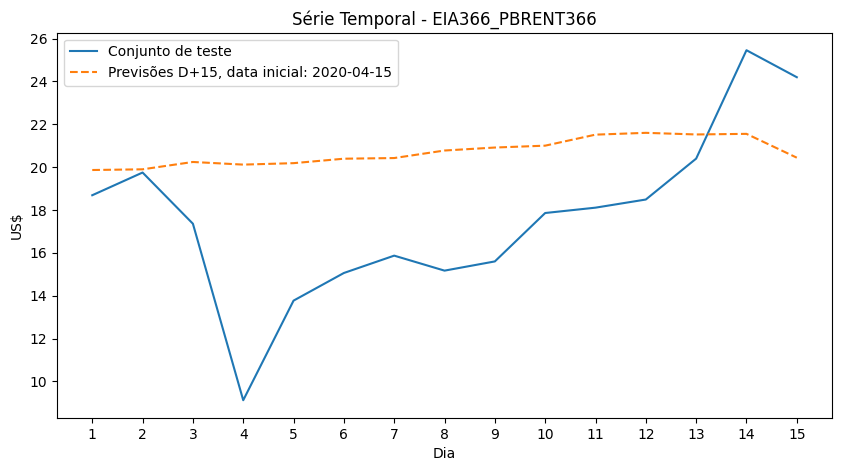

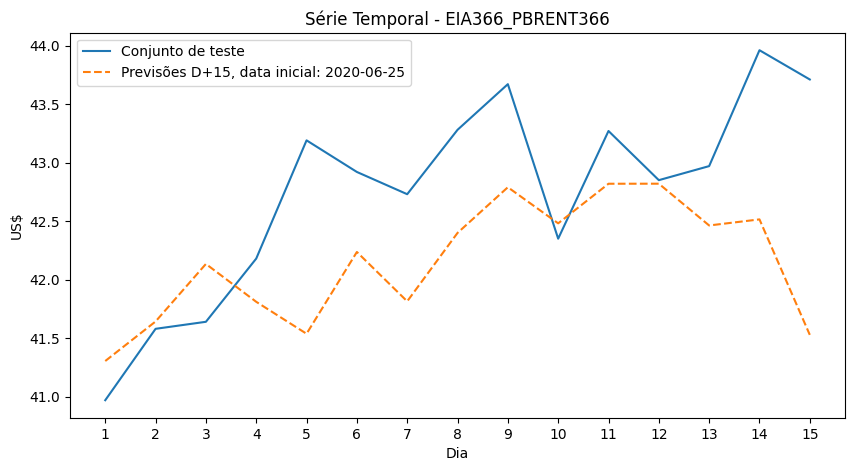

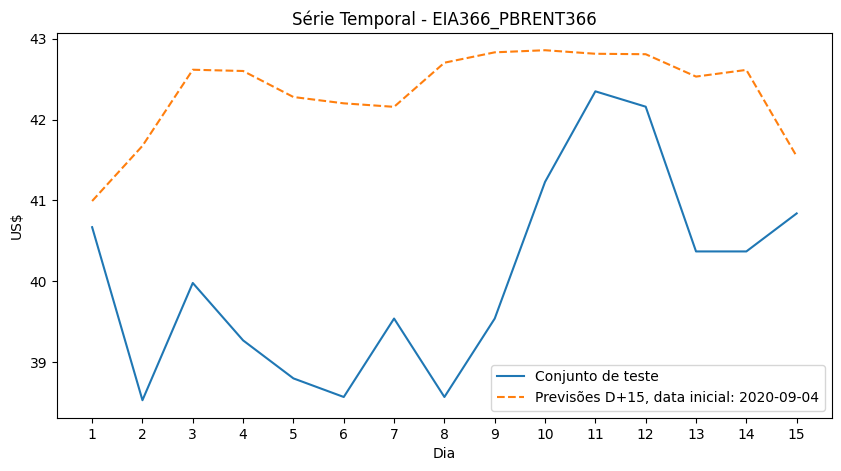

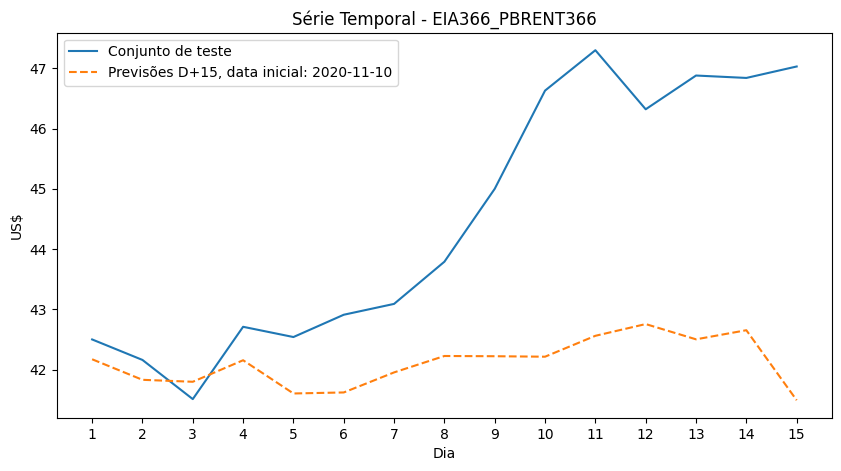

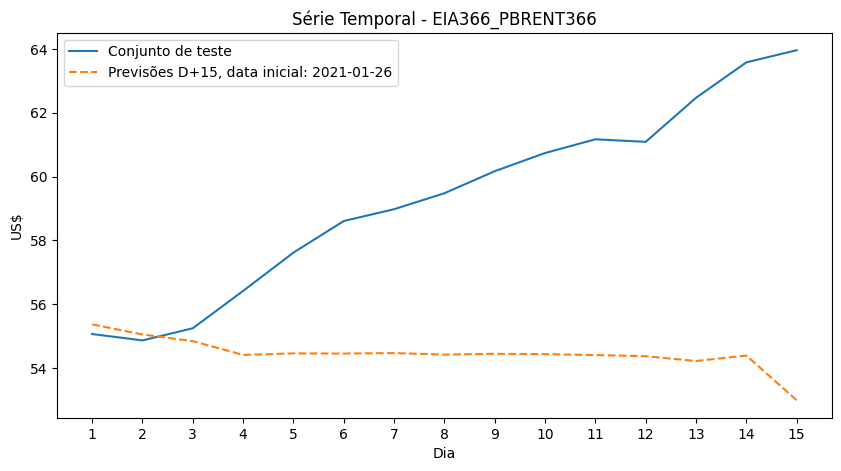

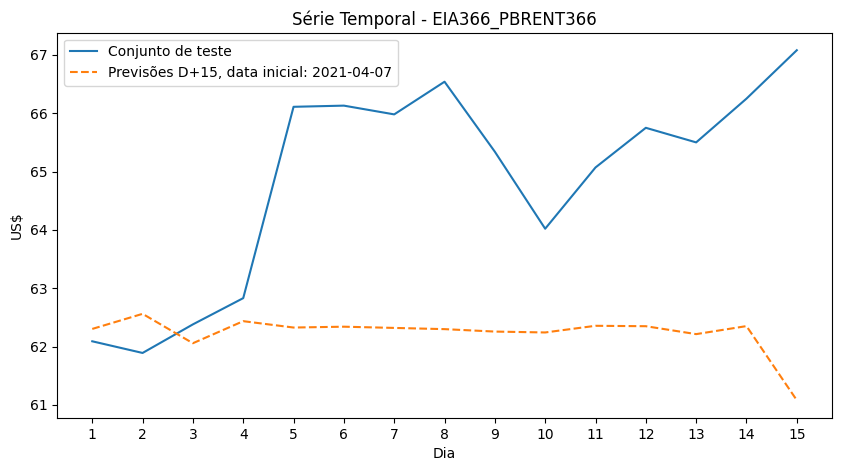

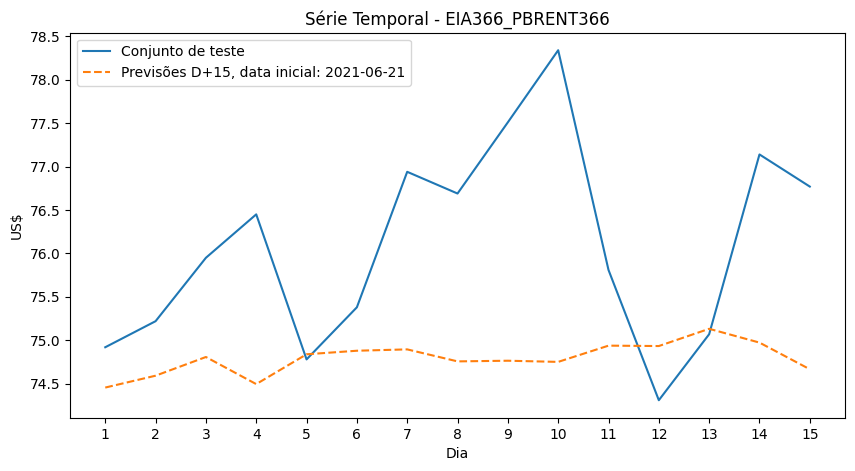

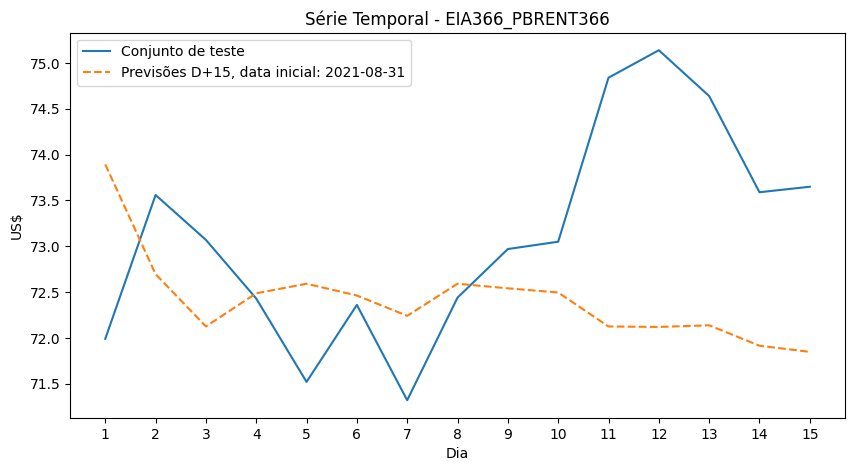

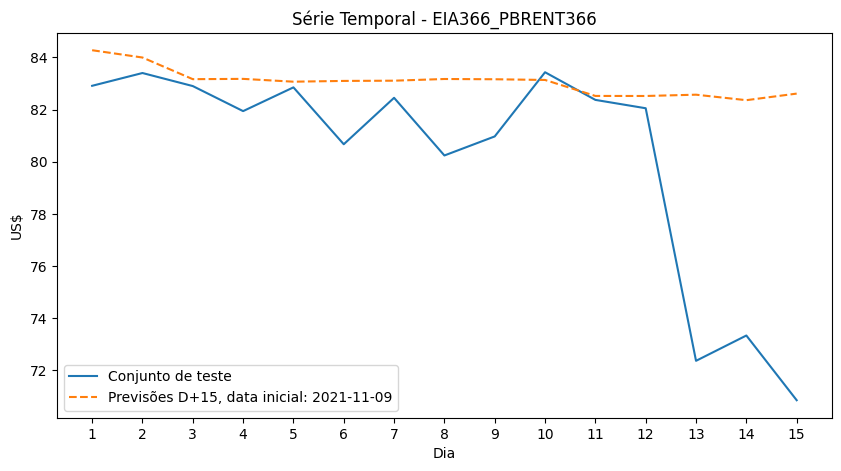

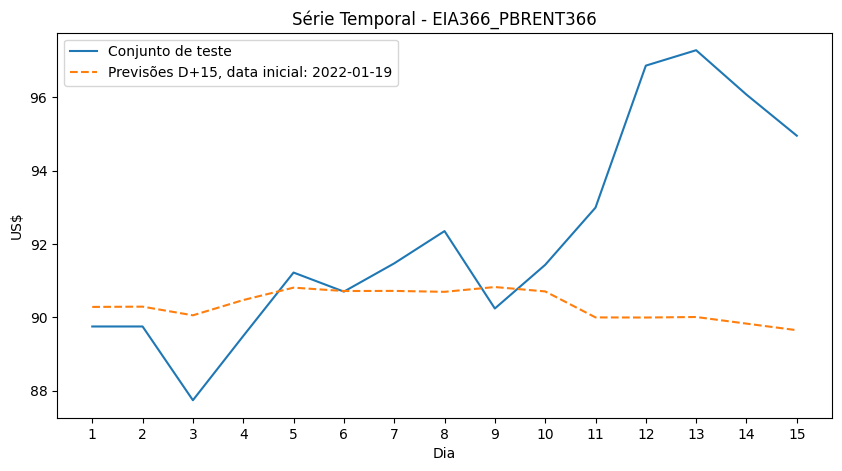

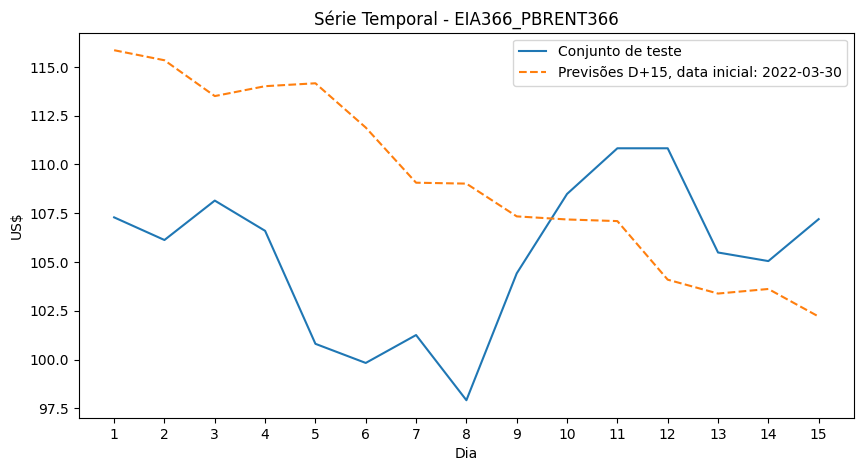

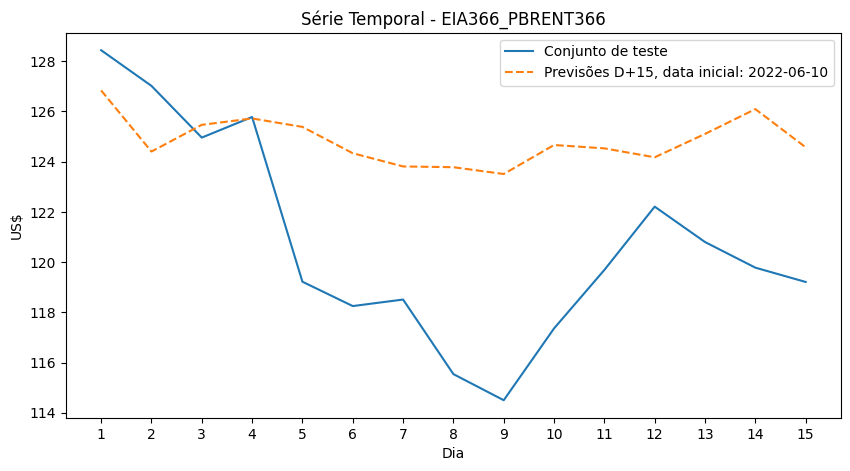

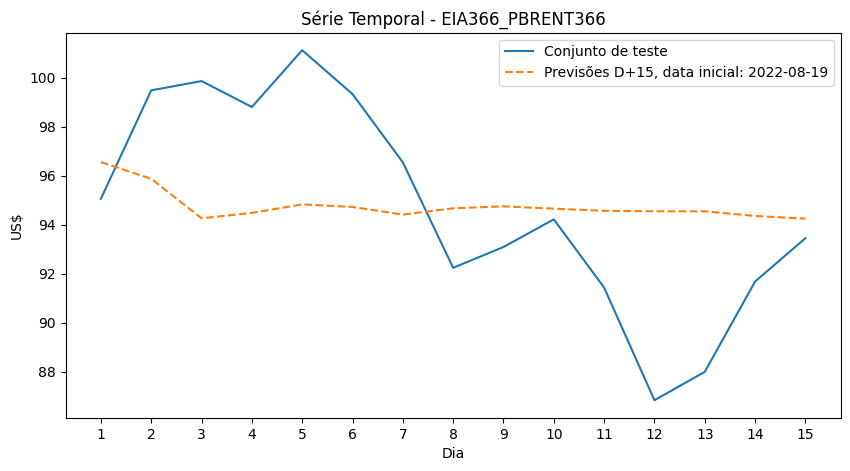

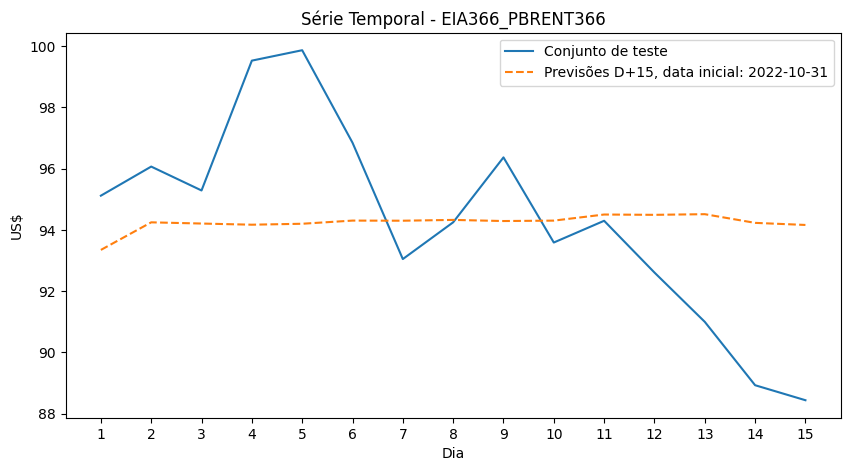

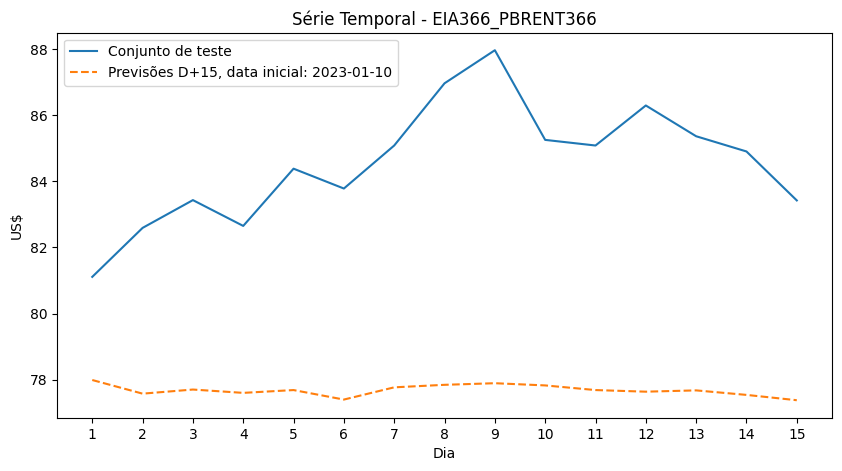

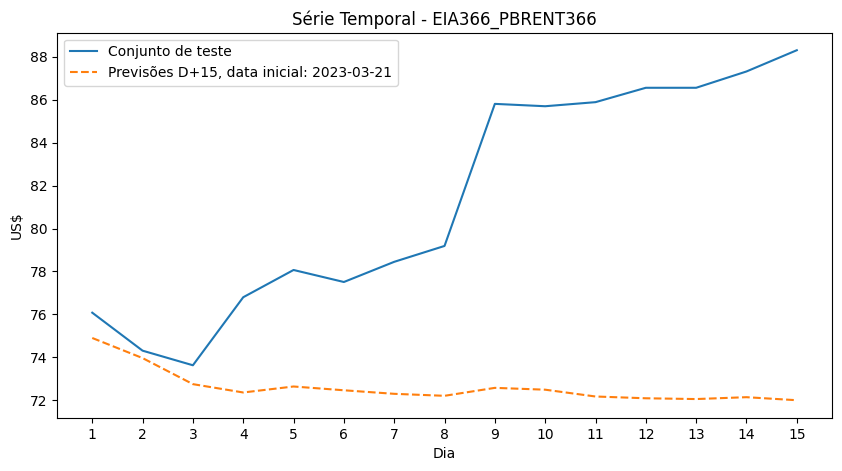

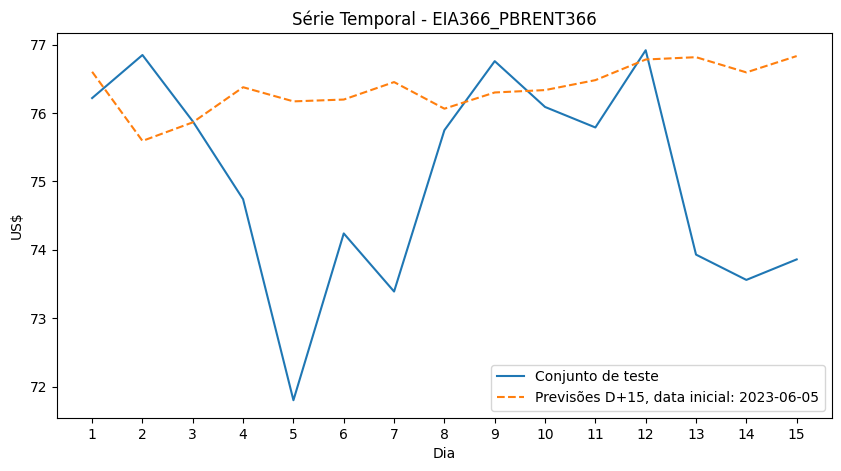

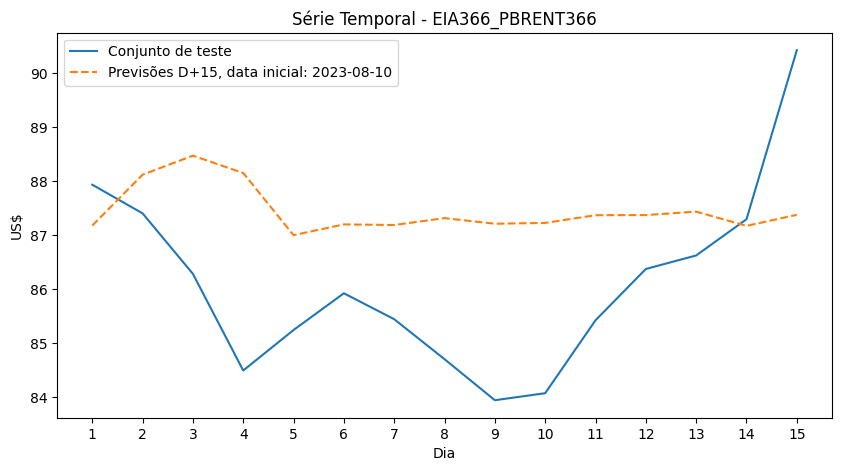

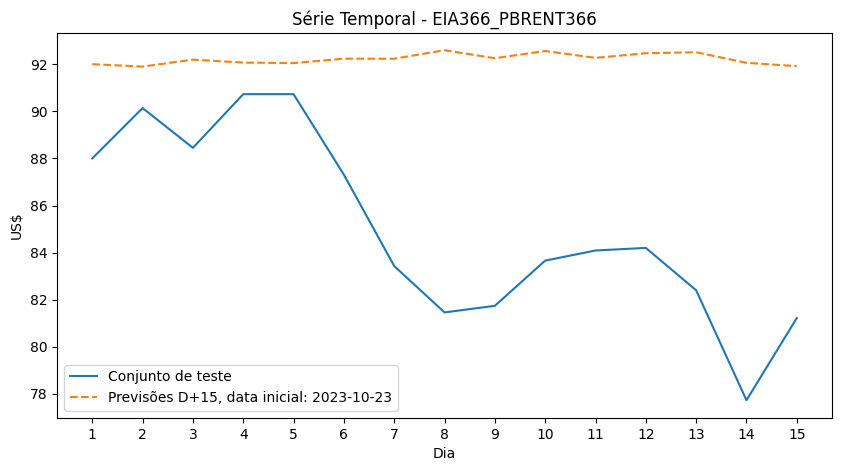

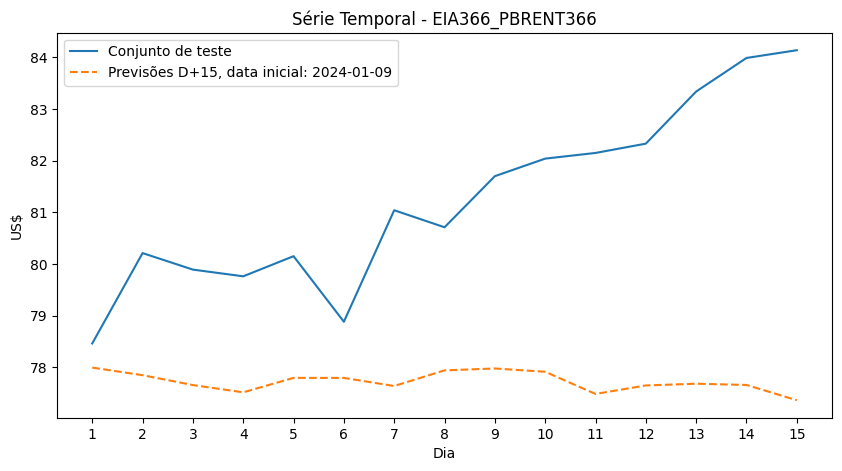

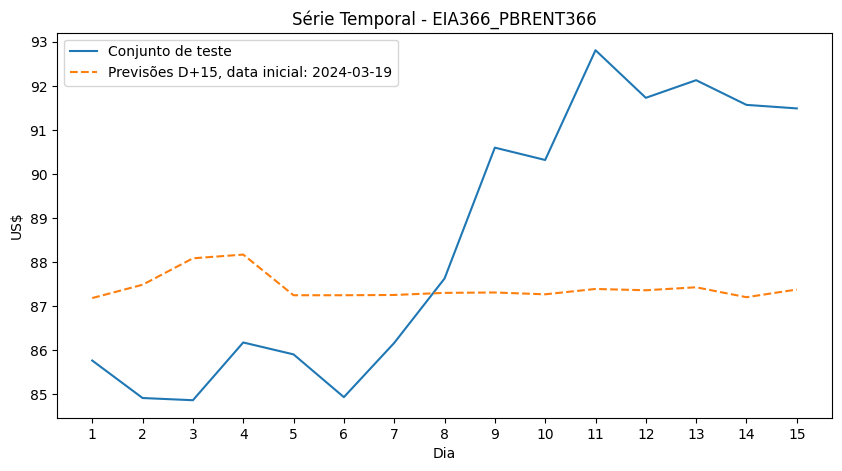

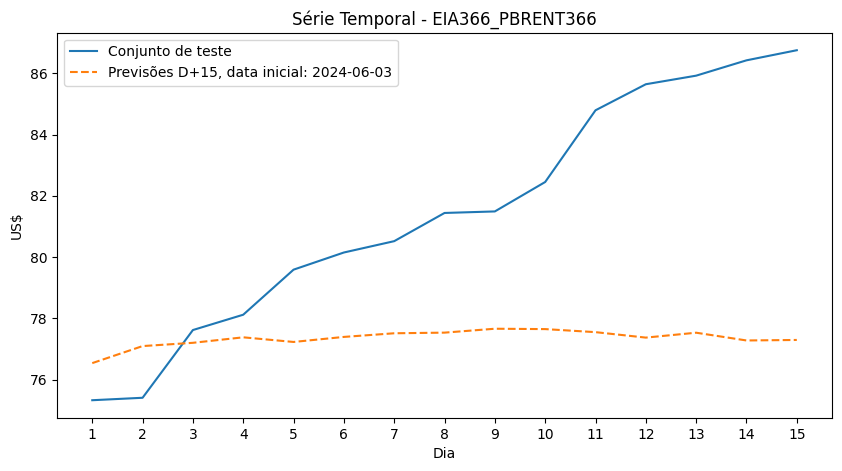

In [138]:
import matplotlib.pyplot as plt

dates = y_test.index

for i in range(0, len(dates), 50):
    plt.figure(figsize=(10, 5))
    plt.title("Série Temporal - EIA366_PBRENT366")
    plt.plot(range(1, 16), y_test.iloc[i, :], label=f"Conjunto de teste")
    plt.plot(range(1, 16), y_pred[i, :], label=f"Previsões D+15, data inicial: {dates[i].strftime('%Y-%m-%d')}", linestyle="--")
    plt.xlabel("Dia")
    plt.ylabel("US$")
    plt.legend()
    plt.xticks(range(1, 16))
    plt.show()


# Fazendo previsões com dados não vistos

In [139]:
# dados para previsão
X_pred = eia366[-15:]
print(X_pred)

            value_usd
date                 
2024-06-11      80.15
2024-06-12      80.52
2024-06-13      81.44
2024-06-14      81.49
2024-06-17      82.45
2024-06-18      84.79
2024-06-19      85.64
2024-06-20      85.92
2024-06-21      86.42
2024-06-24      86.75
2024-06-25      86.81
2024-06-26      85.76
2024-06-27      87.00
2024-06-28      87.26
2024-07-01      86.57


In [140]:
# engenharia de features
feature_engineer = search.best_estimator_.named_steps["feature_engineering"]
X_pred_transformed = feature_engineer.transform(X_pred)[-1:]
X_pred_transformed

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_14,lag_15,rolling_mean_15,diff,month,day_of_week,rolling_std_15,day,quarter,year
date,,,,,,,,,,,,,,,,,,,,,
2024-07-01,86.57,87.26,87.0,85.76,86.81,86.75,86.42,85.92,85.64,84.79,...,80.52,80.15,84.598,-0.69,7,0,2.597667,1,3,2024


In [141]:
# normalização
scaler = search.best_estimator_.named_steps["scaler"]
scaled_data = scaler.transform(X_pred_transformed)
scaled_data

array([[ 1.07934397,  1.10014606,  1.09241163,  1.0552618 ,  1.08687889,
         1.08516717,  1.07535709,  1.06045332,  1.05215007,  1.02673278,
         0.95661183,  0.92791451,  0.92652767,  0.89904343,  0.88806258,
         1.02186441, -0.50725579,  0.13002043, -1.40876412,  1.25857351,
        -1.67871958,  0.43199722,  2.13913321]])

In [142]:
# previsão
model = search.best_estimator_.named_steps["model"]
predictions = model.predict(scaled_data)
predictions

array([[87.18268161, 86.1322008 , 86.01330218, 86.1987525 , 85.26624248,
        85.32473149, 85.28817391, 85.2846134 , 85.25942029, 85.27462565,
        85.66223549, 85.65880677, 85.72850449, 85.44344013, 84.74476058]])

In [143]:
preds_df = pd.DataFrame(predictions.T)
preds_df.columns = ["Preço (US$)"]
preds_df

,Preço (US$)
0,87.182682
1,86.132201
2,86.013302
3,86.198753
4,85.266242
5,85.324731
6,85.288174
7,85.284613
8,85.259420
9,85.274626
